In [1]:
import os, sys, json
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sys.path.append("..")


In [2]:
# read from json
data = None
figure_name_prefix = "figures/"

data_path = "../../../output/prioplus-eurosys25/experiments/fig10d/"
experiment_folders = []
experiment_folders += ["harvest-delay-error-single-scale" + str(i) for i in range(2, 6)]
# experiment_folders += ["harvest-delay-error-single-scale" + s for s in ["09", "11", "15"]]
seed_folders = ["-runtimeConfig::seed-" + str(i) for i in range(1, 6)]

experiment_suffix = ""

In [3]:
all_throughputs = [[] for i in range(len(experiment_folders))]

for experiment_folder in experiment_folders:
    
    throughputs_seed = [0 for i in range(len(seed_folders))]
    
    for seed_folder in seed_folders:
        throughputs = []
    
        # get all files ending with .json in the data_path + experiment_name + /
        experiments = os.listdir(os.path.join(data_path, experiment_folder, experiment_folder + seed_folder))
        experiments = [f[:-5] for f in experiments if f.endswith(".json")]
        # sort accoring to the last number in the name
        experiments.sort(key=lambda s: [float(x) for x in re.findall(r"\d*\.\d+|\d+", s)])
        throughputs = [0 for i in range(len(experiments))]
        

        for exp_idx, experiment_name in enumerate(experiments):

            with open(os.path.join(data_path, experiment_folder, experiment_folder + seed_folder, experiment_name + experiment_suffix + ".json"), "r") as f:
                data = json.load(f)
            
            # read the throughput from data
            throughput = data["overallStatistics"]["totalThroughputBitps"] / 1e9 # Gbps
            
            throughputs[exp_idx] = throughput * 1052 / 1000
        
        throughputs_seed[seed_folders.index(seed_folder)] = throughputs
    
    # take the average of the seeds
    # all_throughputs[experiment_folders.index(experiment_folder)] = throughputs
    all_throughputs[experiment_folders.index(experiment_folder)] = np.mean(throughputs_seed, axis=0)


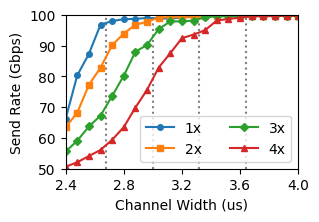

In [4]:
# plot the avg fct and throughput

labels = ["1x", "2x", "3x", "4x"]
markers = ['o', 's', 'D', '^']
maker_size = 4

fig, ax1 = plt.subplots()
fig.set_size_inches(3, 2)
ax1.vlines([2.68, 3.0, 3.32, 3.64], 50, 100, colors='gray', linestyles='dotted')
xs = [x*8*1e3 / 100e9 * 1e6 + 1.6 for x in list(range(10,31))]
for i, throughputs in enumerate(all_throughputs):
    ax1.plot(xs, throughputs, label=labels[i], marker=markers[i], markersize=maker_size)
ax1.set_xlabel('Channel Width (us)')
ax1.set_ylabel('Send Rate (Gbps)')
ax1.legend(ncol=2,)
ax1.set_xlim(2.4, 4)
ax1.set_xticks([2.4, 2.8, 3.2, 3.6, 4])
ax1.set_ylim(50, 100)

plt.savefig("../figures/" + "fig10d" +
            ".pdf", bbox_inches='tight', dpi=600, format='pdf')